In [280]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 



In [281]:
store = pd.DataFrame(pd.read_csv('store.csv',','))
train = pd.DataFrame(pd.read_csv('train.csv',','))
test = pd.DataFrame(pd.read_csv('test.csv',','))

store.info()
train.info()
test.info()


/Users/Aris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
-

In [282]:
store.head()
print('---')
test.head()

---


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

ID present seulement dans le test

## *Store*: caractéristiques relatives à chaque magazin ne changeant pas au cours du temps. 
    


In [283]:
print('Colonnes = ' ,store.columns)
print('Dimension = ' ,store.shape)
store.head()

Colonnes =  Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Dimension =  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [284]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Train

In [285]:
print('Colonnes=' , train.columns)
print('Dimension=' , train.shape)
train.head()

Colonnes= Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Dimension= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [286]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [287]:
columns = [list(store.columns), list(train.columns)]
concat = [item for sublist in columns for item in sublist]
concat
unique 

NameError: name 'unique' is not defined

In [288]:
Pas de NA, dates à convertir, pas de ID (alors que test oui).
Variables non présentes de store.csv: 

SyntaxError: invalid syntax (<ipython-input-288-875e83d4753b>, line 1)

## Test

In [289]:
print('Colonnes = ', test.columns)
print('Dim=', test.shape)
test.head()



Colonnes =  Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Dim= (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [290]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


**Pas de Customers et Sales** 

6955.959133664481 9633659.344467413


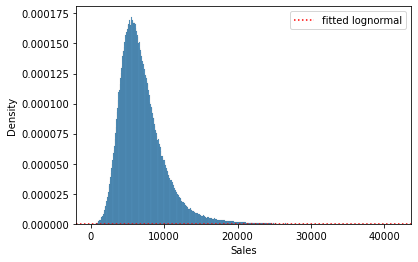

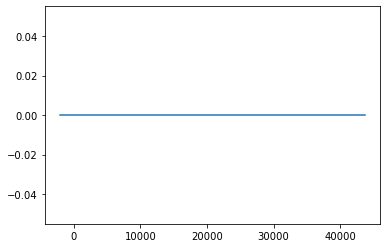

In [291]:
from scipy import stats
ax = sb.histplot(train['Sales'][train['Sales']!=0],stat='density')

sales = train['Sales'][train['Sales']!=0]
mean = np.mean(sales)
var = np.var(sales)
print(mean,var)
sampled = np.random.normal(mean, var, 200)



shape, location, scale = stats.lognorm.fit(sampled)
x_min, x_max = ax.get_xlim()
xs = np.linspace(x_min, x_max, 200)
ax.plot(xs, stats.norm.pdf(xs, loc=location, scale=scale), color='r', ls=':', label='fitted lognormal')
ax.set_xlim(x_min, x_max) # set the limits back to the ones of the distplot
plt.legend()
plt.show()
plt.figure()
plt.plot(xs,stats.norm.pdf(xs, loc=location, scale=scale))

<AxesSubplot:>

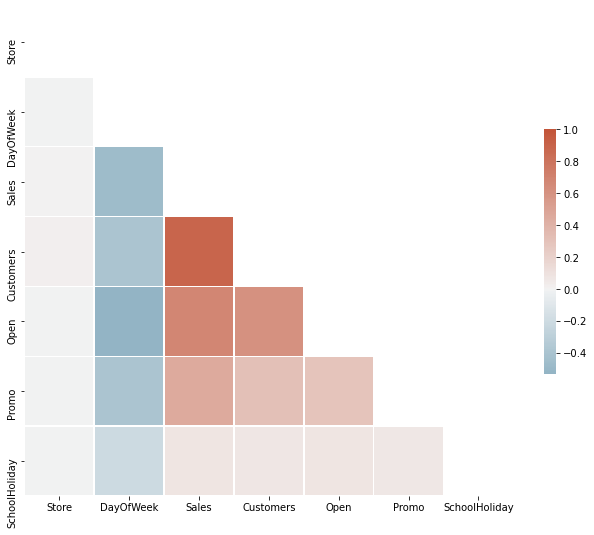

In [292]:
import seaborn as sns
corr = train.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [293]:
store.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [294]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [295]:
train_concat = train.merge(store,'left')

In [296]:
train_concat[train_concat.isna().any(axis=1)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [297]:
train_concat['Date'] = pd.to_datetime(train_concat['Date'],format= '%Y-%m-%d')


store_sorted = train_concat.sort_values('Store')

dates_per_store = []
for i in set(store_sorted['Store']):
    dates_per_store.append(len(store_sorted[store_sorted['Store']==i]))

In [298]:
set(dates_per_store) #{758, 941, 942} we don't always have the same number of dates for each store. 

{758, 941, 942}

In [299]:
train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [300]:
train_concat['Year'] = pd.DatetimeIndex(train_concat['Date']).year
train_concat['Month'] = pd.DatetimeIndex(train_concat['Date']).month
train_concat['Week'] = pd.DatetimeIndex(train_concat['Date']).week

/Users/Aris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


In [301]:
train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [302]:
#Ventes moyennes par magazin: 

mean_sales_store = train_concat.groupby(by='Store',as_index=False)['Sales'].mean()
mean_sales_store.describe()

,Store,Sales
count,1115.00000,1115.000000
mean,558.00000,5763.320541
std,322.01708,2046.447377
min,1.00000,2244.503185
25%,279.50000,4412.415567
50%,558.00000,5459.185775
75%,836.50000,6633.871550
max,1115.00000,20718.515924


<AxesSubplot:>

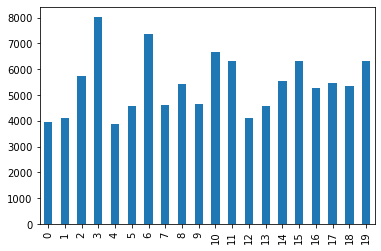

In [303]:
mean_sales_store['Sales'][0:20].plot(kind='bar')



In [304]:
set(train_concat['StateHoliday']) # {0, '0', 'a', 'b', 'c'} Attention 0 , '0'
set(train_concat['SchoolHoliday']) #{0,1}

{0, 1}

In [306]:
train_concat.loc[train_concat['StateHoliday'] == 0,'StateHoliday'] = '0'
set(train_concat['StateHoliday'])
train_concat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Choisissons quelques magazins: un qui fait les plus grosses ventes en moyenne sur la periode disponible, un avec le moins de ventes, et deux ou trois au hazard. Ensuite on tente d'évaluer les ventes moyennes en fonction de la periode de vacance, annuellement, en fonction des promos. 

In [307]:
#mean_sales_store[,'Store']
mag_min = mean_sales_store.loc[np.argmin(mean_sales_store.loc[:,'Sales']),'Store']
mag_max = mean_sales_store.loc[np.argmax(mean_sales_store.loc[:,'Sales']),'Store']

magazins = [mag_min, mag_max, 30, 1000]


In [328]:
means_per_year= []
means_per_month = []
means_per_school = []
means_per_state = []
means_per_promo = []
means_per_competition_year = []
means_per_competition_month = []
means_per_competition = []
means_per_promo2 = []
means_per_promo2_year = []
means_per_promo2_week = []



train_concat['Sales'] = pd.to_numeric(train_concat['Sales'])
for i, val in enumerate(magazins):
    means_per_year.append(train_concat[train_concat['Store'] == val].groupby(by='Year',as_index=False)['Sales'].mean())
    means_per_month.append(train_concat[train_concat['Store'] == val].groupby(by='Month',as_index=False)['Sales'].mean())
    means_per_school.append(train_concat[train_concat['Store'] == val].groupby(by='SchoolHoliday',as_index=False)['Sales'].mean())
    means_per_state.append(train_concat[train_concat['Store'] == val].groupby(by='StateHoliday',as_index=False)['Sales'].mean())
    means_per_promo.append(train_concat[train_concat['Store'] == val].groupby(by='Promo',as_index=False)['Sales'].mean())
    means_per_promo2.append(train_concat[train_concat['Store'] == val].groupby(by='Promo2',as_index=False)['Sales'].mean())
    means_per_promo2_week.append(train_concat[train_concat['Store'] == val].groupby(by='Promo2SinceWeek',as_index=False)['Sales'].mean())
    means_per_promo2_year.append(train_concat[train_concat['Store'] == val].groupby(by='Promo2SinceYear',as_index=False)['Sales'].mean())
   
    

In [327]:
#df_year = pd.concat(means_per_year,axis=1)

#for i in range(4):
#    means_per_year[i].plot(kind = 'bar', x= 'Year',y='Sales')
df_year.head()


{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 20.0,
 nan,
 nan,
 nan,
 nan,
 8220.0,
 30.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 16420.0,
 nan,
 nan,
 nan,
 40.0,
 8240.0,
 50.0,
 8250.0,
 60.0,
 8260.0,
 70.0,
 nan,
 nan,
 nan,
 nan,
 80.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 90.0,
 100.0,
 16490.0,
 8300.0,
 110.0,
 120.0,
 130.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 140.0,
 150.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 160.0,
 nan,
 nan,
 nan,
 170.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 180.0,
 nan,
 nan,
 nan,
 16570.0,
 190.0,
 nan,
 nan,
 nan,
 24770.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 200.0,
 8400.0,
 210.0,
 220.0,
 230.0,
 240.0,
 250.0,
 260.0,
 8460.0,
 270.0,
 280.0,
 8480.0,
 290.0,
 nan,
 33060.0,
 nan,
 nan,
 nan,
 16680.0,
 nan,
 nan,
 nan,
 300.0,
 16690.0,
 310.0,
 nan,
 nan,
 nan,
 320.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 330.0

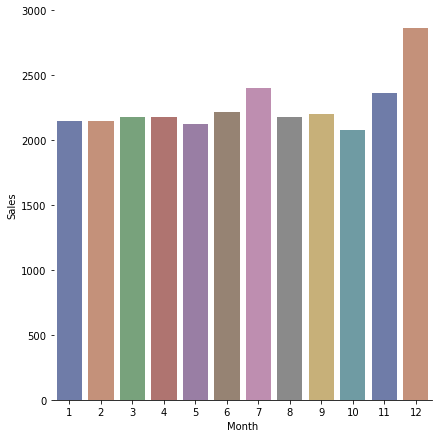

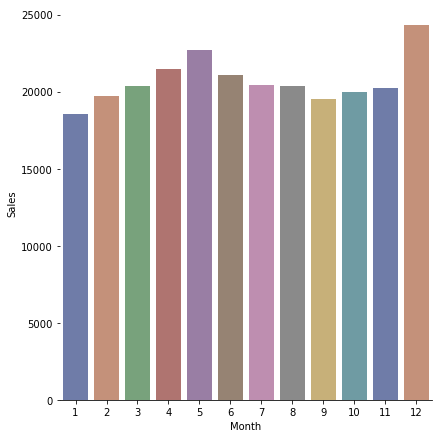

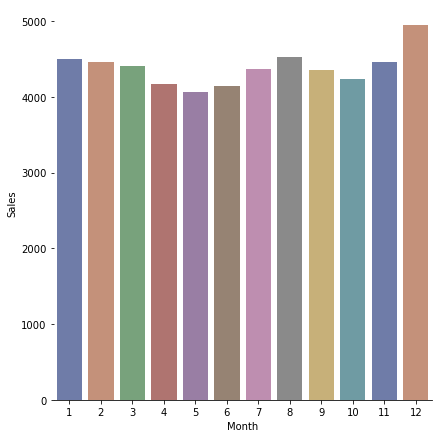

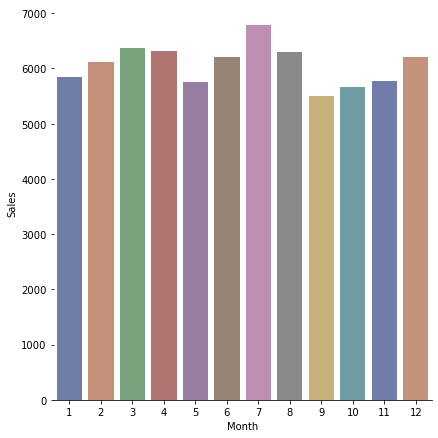

In [309]:

for i in range(4):
# Draw a nested barplot by species and sex
    g = sns.catplot(
    data=means_per_month[i], kind="bar",
    x="Month", y="Sales", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)


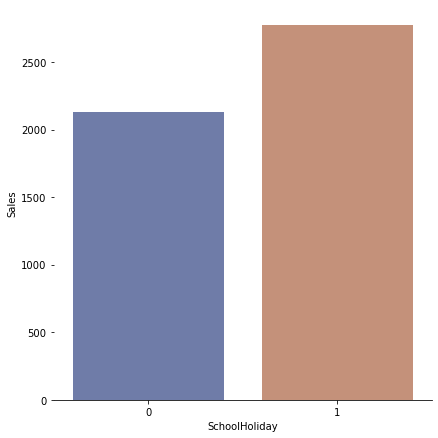

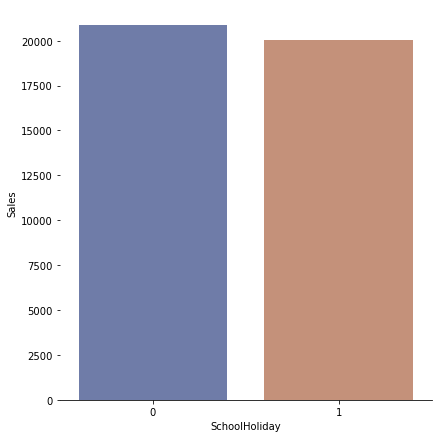

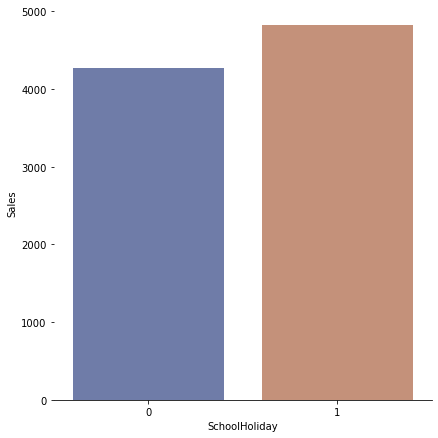

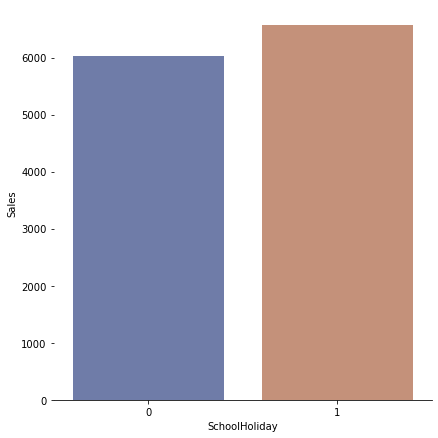

In [310]:

for i in range(4):
# Draw a nested barplot by species and sex
    g = sns.catplot(
    data=means_per_school[i], kind="bar",
    x="SchoolHoliday", y="Sales", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)

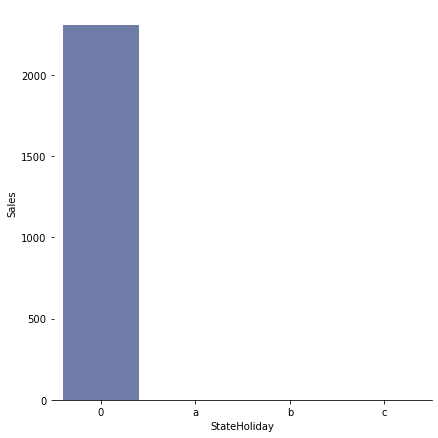

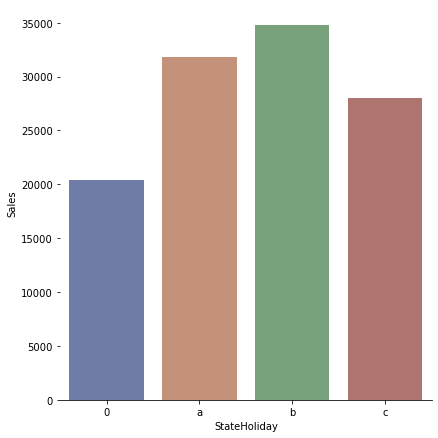

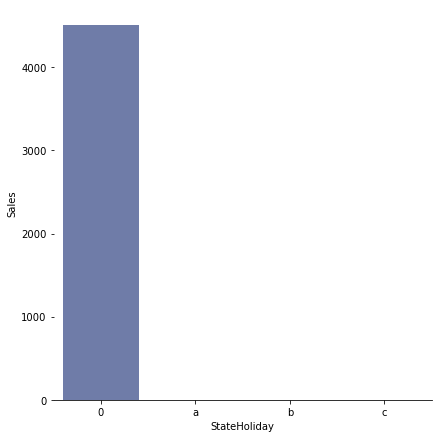

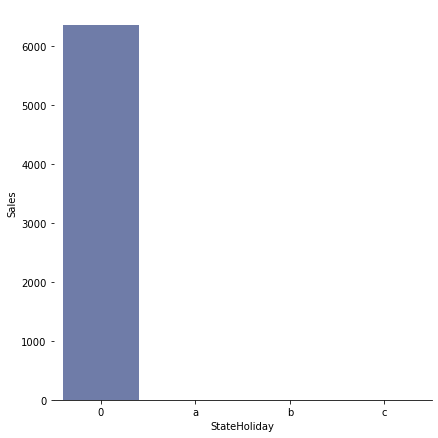

In [311]:

for i in range(4):
# Draw a nested barplot by species and sex
    g = sns.catplot(
    data=means_per_state[i], kind="bar",
    x="StateHoliday", y="Sales", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)

In [332]:
means_per_promo2[0]

,Promo2,Sales
0,0,2244.503185


On remarque que certains magazins ferment les vacances tandis que d'autres non. Il est donc important de prendre en compte ces vacances. De plus les magazins ouverts pendants les jours feriés semblent faire plus de chiffre en fonction de la catégorie de la periode d'ouverture. Ainsi il est important de savoir quel est le type de vacances. 

In [326]:
### Preprocessing: 
train_concat.loc[train_concat['Promo2']=='0','Promo2'] = 0
train_concat[train_concat.isna().any(axis=1)].info()
print(train_concat[train_concat['Promo2']==0]['Promo2SinceWeek'].isna().all())##True DONC NA pour 0. False pour 1
nas = train_concat[train_concat.isna().any(axis=1)]
print(len(nas[nas['Promo2']==0]))
nas[nas['CompetitionDistance']].mean()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 692883 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      692883 non-null  int64         
 1   DayOfWeek                  692883 non-null  int64         
 2   Date                       692883 non-null  datetime64[ns]
 3   Sales                      692883 non-null  int64         
 4   Customers                  692883 non-null  int64         
 5   Open                       692883 non-null  int64         
 6   Promo                      692883 non-null  int64         
 7   StateHoliday               692883 non-null  object        
 8   SchoolHoliday              692883 non-null  int64         
 9   StoreType                  692883 non-null  object        
 10  Assortment                 692883 non-null  object        
 11  CompetitionDistance        690241 non-null  float64

5968.078700048244

In [340]:
store.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [350]:
set(train_concat['Promo2'])

train_concat = train_concat.drop('CompetitionOpenSinceMonth',axis=1)
train_concat = train_concat.drop('Promo2SinceWeek',axis=1)






KeyError: "['CompetitionOpenSinceMonth'] not found in axis"

In [353]:
train_concat['CompetitionOpenSinceYear'].value_counts() #2013 is the most occuring month for opening
train_concat['Promo2SinceYear'].value_counts() # 2011/2013 most occuring
train_concat.loc[train_concat['Promo2SinceYear'].isna(),'Promo2SinceYear'] = 2011
train_concat.loc[train_concat['CompetitionOpenSinceYear'].isna(),'CompetitionOpenSinceYear'] = 2013

In [369]:
zoom = train_concat.loc[train_concat['Promo2']==0 ,['CompetitionDistance','PromoInterval','Assortment','StoreType']]
zoom.notna().any() #False 
train_concat.loc[train_concat['Promo2']==0 ,['PromoInterval']] = 0

In [371]:
train_concat.loc[train_concat['CompetitionDistance'].isna(),'CompetitionDistance'] = train_concat['CompetitionDistance'].mean()

In [377]:
train_concat.drop(['Date'],axis=1,inplace=True)
train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Store                     1017209 non-null  int64  
 1   DayOfWeek                 1017209 non-null  int64  
 2   Sales                     1017209 non-null  int64  
 3   Customers                 1017209 non-null  int64  
 4   Open                      1017209 non-null  int64  
 5   Promo                     1017209 non-null  int64  
 6   StateHoliday              1017209 non-null  object 
 7   SchoolHoliday             1017209 non-null  int64  
 8   StoreType                 1017209 non-null  object 
 9   Assortment                1017209 non-null  object 
 10  CompetitionDistance       1017209 non-null  float64
 11  CompetitionOpenSinceYear  1017209 non-null  float64
 12  Promo2                    1017209 non-null  int64  
 13  Promo2SinceYear           1

In [382]:
train_concat.drop(['Customers'],axis=1,inplace=True)
train_concat.info()


KeyError: "['Customers'] not found in axis"

In [409]:
train_concat.loc[train_concat['PromoInterval']==0,'PromoInterval'] = '0'


In [447]:
X = train_concat.drop('Sales',axis=1)
y = train_concat['Sales']

In [449]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor

cat_col = ['PromoInterval', 'Assortment', 'StoreType', 'StateHoliday','Store', 'DayOfWeek']

categorical_preprocessing = make_column_transformer(
    (OrdinalEncoder(), cat_col)
)
model = make_pipeline(
    categorical_preprocessing,
    RandomForestRegressor(n_estimators=100,max_depth= 7,)
)




In [450]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [451]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['PromoInterval',
                                                   'Assortment', 'StoreType',
                                                   'StateHoliday', 'Store',
                                                   'DayOfWeek'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=7, n_estimators=300))])

In [472]:
ypred = model.predict(X_test)

In [474]:
np.sqrt(np.mean((ypred-y_test)**2))


2657.5841197812783

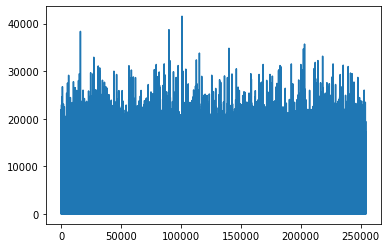

In [468]:
plt.plot(np.array(y_test))

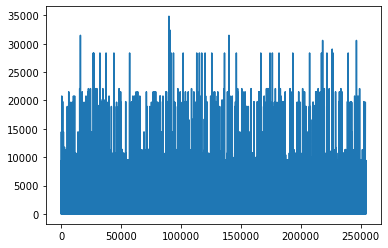

In [469]:
plt.plot(ypred)

16

In [488]:
from catboost import CatBoostRegressor

model = make_pipeline(
    categorical_preprocessing,
    CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=7)
)

model.fit(X_train,y_train)


0:	learn: 2754.6230211	total: 106ms	remaining: 1m 45s
1:	learn: 2668.3746087	total: 189ms	remaining: 1m 34s
2:	learn: 2627.3940423	total: 274ms	remaining: 1m 31s
3:	learn: 2589.4486382	total: 377ms	remaining: 1m 33s
4:	learn: 2560.8596862	total: 481ms	remaining: 1m 35s
5:	learn: 2535.0197153	total: 566ms	remaining: 1m 33s
6:	learn: 2523.6289920	total: 677ms	remaining: 1m 35s
7:	learn: 2501.2576869	total: 764ms	remaining: 1m 34s
8:	learn: 2476.3556522	total: 861ms	remaining: 1m 34s
9:	learn: 2458.8508055	total: 986ms	remaining: 1m 37s
10:	learn: 2423.6336120	total: 1.08s	remaining: 1m 37s
11:	learn: 2413.9960338	total: 1.16s	remaining: 1m 35s
12:	learn: 2405.7783144	total: 1.26s	remaining: 1m 36s
13:	learn: 2397.3383277	total: 1.38s	remaining: 1m 36s
14:	learn: 2388.1506059	total: 1.45s	remaining: 1m 35s
15:	learn: 2377.0118678	total: 1.56s	remaining: 1m 36s
16:	learn: 2364.4062494	total: 1.66s	remaining: 1m 35s
17:	learn: 2358.5965424	total: 1.73s	remaining: 1m 34s
18:	learn: 2336.4681

150:	learn: 1886.6902002	total: 19.7s	remaining: 1m 50s
151:	learn: 1885.6219278	total: 19.8s	remaining: 1m 50s
152:	learn: 1885.1021023	total: 20s	remaining: 1m 50s
153:	learn: 1884.0765895	total: 20.1s	remaining: 1m 50s
154:	learn: 1882.7303625	total: 20.2s	remaining: 1m 50s
155:	learn: 1882.0008906	total: 20.3s	remaining: 1m 50s
156:	learn: 1880.7333092	total: 20.4s	remaining: 1m 49s
157:	learn: 1879.8087543	total: 20.5s	remaining: 1m 49s
158:	learn: 1879.4824675	total: 20.7s	remaining: 1m 49s
159:	learn: 1878.9373945	total: 20.9s	remaining: 1m 49s
160:	learn: 1878.4575732	total: 21.1s	remaining: 1m 49s
161:	learn: 1877.8181091	total: 21.2s	remaining: 1m 49s
162:	learn: 1877.2349553	total: 21.3s	remaining: 1m 49s
163:	learn: 1876.5160378	total: 21.4s	remaining: 1m 49s
164:	learn: 1875.7910975	total: 21.6s	remaining: 1m 49s
165:	learn: 1875.1784107	total: 21.7s	remaining: 1m 49s
166:	learn: 1873.4951121	total: 21.8s	remaining: 1m 48s
167:	learn: 1873.0481736	total: 21.9s	remaining: 1

298:	learn: 1818.1199743	total: 38.4s	remaining: 1m 29s
299:	learn: 1817.9828095	total: 38.5s	remaining: 1m 29s
300:	learn: 1817.4979111	total: 38.6s	remaining: 1m 29s
301:	learn: 1816.9291618	total: 38.7s	remaining: 1m 29s
302:	learn: 1816.7967179	total: 38.8s	remaining: 1m 29s
303:	learn: 1816.5376923	total: 38.9s	remaining: 1m 29s
304:	learn: 1816.4470924	total: 39s	remaining: 1m 28s
305:	learn: 1816.2764760	total: 39.1s	remaining: 1m 28s
306:	learn: 1816.1796163	total: 39.2s	remaining: 1m 28s
307:	learn: 1815.8730140	total: 39.4s	remaining: 1m 28s
308:	learn: 1815.7521446	total: 39.5s	remaining: 1m 28s
309:	learn: 1815.4530364	total: 39.6s	remaining: 1m 28s
310:	learn: 1815.3674561	total: 39.7s	remaining: 1m 28s
311:	learn: 1814.9747440	total: 39.9s	remaining: 1m 27s
312:	learn: 1814.8338717	total: 40s	remaining: 1m 27s
313:	learn: 1814.7110995	total: 40.1s	remaining: 1m 27s
314:	learn: 1814.4087786	total: 40.3s	remaining: 1m 27s
315:	learn: 1814.1895962	total: 40.4s	remaining: 1m 

445:	learn: 1798.9807549	total: 55.7s	remaining: 1m 9s
446:	learn: 1798.9612714	total: 55.9s	remaining: 1m 9s
447:	learn: 1798.8809853	total: 56s	remaining: 1m 8s
448:	learn: 1798.8276303	total: 56.1s	remaining: 1m 8s
449:	learn: 1798.6553462	total: 56.3s	remaining: 1m 8s
450:	learn: 1798.6079045	total: 56.4s	remaining: 1m 8s
451:	learn: 1798.3890715	total: 56.5s	remaining: 1m 8s
452:	learn: 1798.3279104	total: 56.6s	remaining: 1m 8s
453:	learn: 1798.2966588	total: 56.7s	remaining: 1m 8s
454:	learn: 1798.2190849	total: 56.8s	remaining: 1m 8s
455:	learn: 1798.1871542	total: 56.9s	remaining: 1m 7s
456:	learn: 1797.9922491	total: 57.1s	remaining: 1m 7s
457:	learn: 1797.8793461	total: 57.2s	remaining: 1m 7s
458:	learn: 1797.7985952	total: 57.3s	remaining: 1m 7s
459:	learn: 1797.6966499	total: 57.4s	remaining: 1m 7s
460:	learn: 1797.6678762	total: 57.5s	remaining: 1m 7s
461:	learn: 1797.6372293	total: 57.6s	remaining: 1m 7s
462:	learn: 1797.5595961	total: 57.7s	remaining: 1m 6s
463:	learn: 

595:	learn: 1788.4402813	total: 1m 13s	remaining: 49.9s
596:	learn: 1788.3499390	total: 1m 13s	remaining: 49.8s
597:	learn: 1788.3134620	total: 1m 13s	remaining: 49.7s
598:	learn: 1788.2037631	total: 1m 13s	remaining: 49.5s
599:	learn: 1788.1337899	total: 1m 14s	remaining: 49.4s
600:	learn: 1788.1017091	total: 1m 14s	remaining: 49.2s
601:	learn: 1788.0829973	total: 1m 14s	remaining: 49.1s
602:	learn: 1788.0349596	total: 1m 14s	remaining: 48.9s
603:	learn: 1787.9946336	total: 1m 14s	remaining: 48.8s
604:	learn: 1787.9216381	total: 1m 14s	remaining: 48.7s
605:	learn: 1787.8656329	total: 1m 14s	remaining: 48.6s
606:	learn: 1787.8284372	total: 1m 14s	remaining: 48.5s
607:	learn: 1787.7991701	total: 1m 14s	remaining: 48.3s
608:	learn: 1787.7568940	total: 1m 15s	remaining: 48.2s
609:	learn: 1787.7268051	total: 1m 15s	remaining: 48s
610:	learn: 1787.6656447	total: 1m 15s	remaining: 47.9s
611:	learn: 1787.6249055	total: 1m 15s	remaining: 47.8s
612:	learn: 1787.5852486	total: 1m 15s	remaining: 

742:	learn: 1783.4594718	total: 1m 31s	remaining: 31.8s
743:	learn: 1783.4374355	total: 1m 32s	remaining: 31.7s
744:	learn: 1783.3743548	total: 1m 32s	remaining: 31.6s
745:	learn: 1783.3489437	total: 1m 32s	remaining: 31.5s
746:	learn: 1783.3244455	total: 1m 32s	remaining: 31.4s
747:	learn: 1783.3115800	total: 1m 32s	remaining: 31.2s
748:	learn: 1783.3052331	total: 1m 32s	remaining: 31.1s
749:	learn: 1783.2973416	total: 1m 32s	remaining: 31s
750:	learn: 1783.2735474	total: 1m 33s	remaining: 30.8s
751:	learn: 1783.2575316	total: 1m 33s	remaining: 30.7s
752:	learn: 1783.2256917	total: 1m 33s	remaining: 30.6s
753:	learn: 1783.1994908	total: 1m 33s	remaining: 30.5s
754:	learn: 1783.1672786	total: 1m 33s	remaining: 30.3s
755:	learn: 1783.1560874	total: 1m 33s	remaining: 30.2s
756:	learn: 1783.1371870	total: 1m 33s	remaining: 30.1s
757:	learn: 1783.1249439	total: 1m 33s	remaining: 29.9s
758:	learn: 1783.0867780	total: 1m 33s	remaining: 29.8s
759:	learn: 1783.0712014	total: 1m 34s	remaining: 

889:	learn: 1780.3681140	total: 1m 50s	remaining: 13.7s
890:	learn: 1780.3480659	total: 1m 50s	remaining: 13.5s
891:	learn: 1780.3303092	total: 1m 50s	remaining: 13.4s
892:	learn: 1780.3256978	total: 1m 51s	remaining: 13.3s
893:	learn: 1780.3197185	total: 1m 51s	remaining: 13.2s
894:	learn: 1780.3049078	total: 1m 51s	remaining: 13.1s
895:	learn: 1780.2993740	total: 1m 51s	remaining: 12.9s
896:	learn: 1780.2909441	total: 1m 51s	remaining: 12.8s
897:	learn: 1780.2811342	total: 1m 51s	remaining: 12.7s
898:	learn: 1780.2741501	total: 1m 51s	remaining: 12.6s
899:	learn: 1780.2646952	total: 1m 52s	remaining: 12.4s
900:	learn: 1780.2495511	total: 1m 52s	remaining: 12.3s
901:	learn: 1780.2461585	total: 1m 52s	remaining: 12.2s
902:	learn: 1780.2368235	total: 1m 52s	remaining: 12.1s
903:	learn: 1780.2230045	total: 1m 52s	remaining: 11.9s
904:	learn: 1780.2117095	total: 1m 52s	remaining: 11.8s
905:	learn: 1780.1858342	total: 1m 52s	remaining: 11.7s
906:	learn: 1780.1733155	total: 1m 52s	remaining

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['PromoInterval',
                                                   'Assortment', 'StoreType',
                                                   'StateHoliday', 'Store',
                                                   'DayOfWeek'])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x1af024c048>)])

In [490]:
ypred = model.predict(X_test)

In [491]:
np.sqrt(np.mean((ypred-y_test)**2))

1787.682400232252